In [ ]:
import torch
from torch import nn,optim
from sklearn.preprocessing import StandardScaler,LabelEncoder  
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset,DataLoader
from sklearn import metrics
import pandas as pd
import numpy as np
import time
import os


import matplotlib.pyplot as plt


# Configurando hiperparâmetros.

args = {
    'epoch_num': 5000,     # Número de épocas.
    'lr': 5e-5,           # Taxa de aprendizado.
    'weight_decay': 5e-4, # Penalidade L2 (Regularização).
    #'num_workers': 3,     # Número de threads do dataloader.
    #'batch_size': 20,     # Tamanho do batch.
}

if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print(args['device'])


cuda


In [ ]:


iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

In [ ]:
X_train = torch.from_numpy(X_train).float().to(args['device'])
y_train = torch.from_numpy(y_train).long().to(args['device'])
X_test  = torch.from_numpy(X_test).float().to(args['device'])
y_test  = torch.from_numpy(y_test).long().to(args['device'])


In [ ]:
class IrisClassifier(nn.Module):
  def __init__(self,input_size,hidden_size,out_size):
    super(IrisClassifier,self).__init__()
    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.out = nn.Linear(hidden_size,out_size)
    self.softmax = nn.Softmax(dim = -1) #-1 serve pra transformar a ultima dimensão em uma distribuição de probabilidades
  def forward(self,X):
    feature = self.relu(self.hidden(X))
    output = self.softmax(self.out(feature))
    return output

input_size  = 4
hidden_size = 8
out_size    = 3

net = IrisClassifier(input_size, hidden_size, out_size).to(args['device'])
print(net)

IrisClassifier(
  (hidden): Linear(in_features=4, out_features=8, bias=True)
  (relu): ReLU()
  (out): Linear(in_features=8, out_features=3, bias=True)
  (softmax): Softmax(dim=-1)
)


In [ ]:
criterion = nn.CrossEntropyLoss().to(args['device']) #funçao de perda
optimizer = optim.Adam(net.parameters(),lr=0.0003,weight_decay = 0.05)

In [ ]:
todas_loss=[]
epocas=[]
i=0

In [ ]:

for c in range(args['epoch_num']):
    i+=1

    
    # Forward
    ypred = net(X_train)
    loss = criterion(ypred, y_train)
    
    todas_loss.append(loss.cpu().detach().numpy())
    epocas.append(i)

    # Backpropagation
    loss.backward()
    optimizer.step()

In [ ]:

acertos=0
erros=0
pred = net(X_test)
for n,c in enumerate(pred):
  a = c.cpu().detach().numpy().round()
  b = y_test[n].cpu().detach().numpy()
  if a[0] == 1 and b == 0:
    acertos += 1
  elif a[1] == 1 and b == 1:
    acertos += 1
  elif a[2] == 1 and b == 2:
    acertos += 1
  else:
    erros+=1
print(f'{int((acertos/len(X_test))*100)}% de acertividade')

96% de acertividade


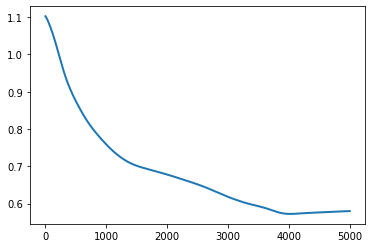

In [ ]:
fig, ax = plt.subplots()

ax.plot(epocas, todas_loss, linewidth=2.0)


plt.show()